<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
Mean squared error of LR: 0.57
Coefficient of determination of LR: 0.27
Mean squared error of DT: 1.00
Coefficient of determin

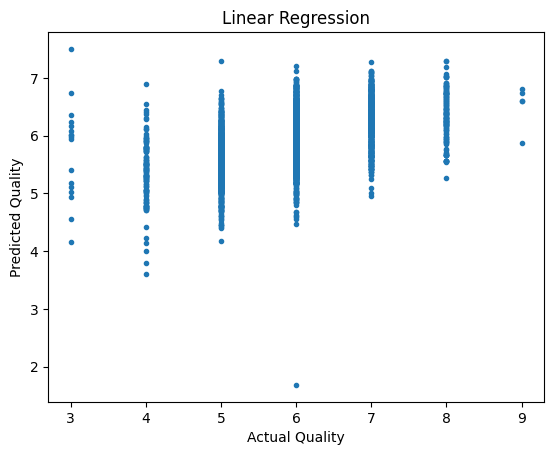

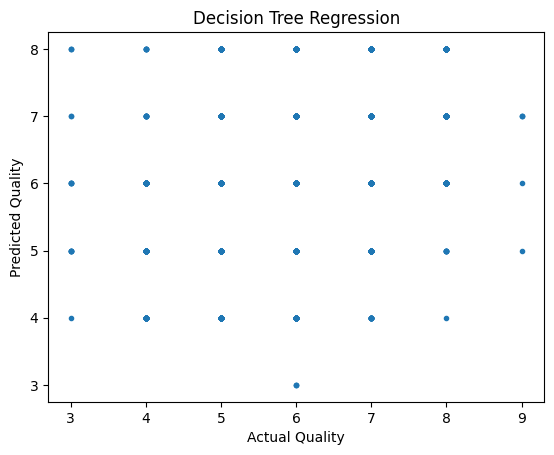

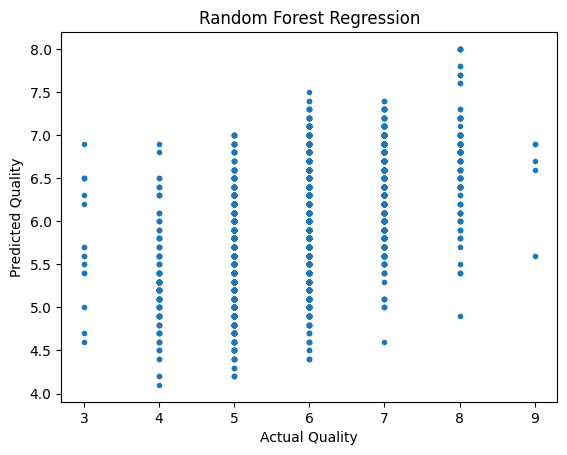

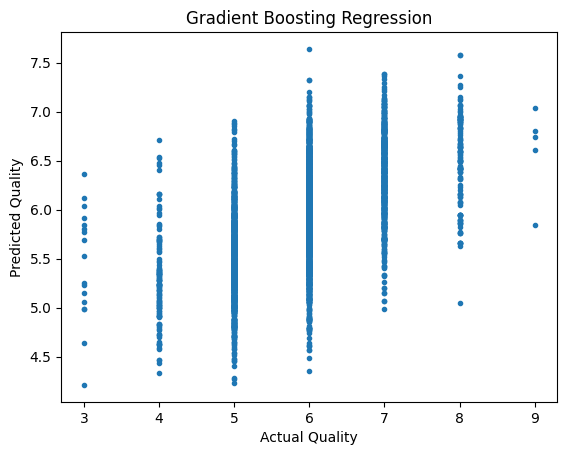

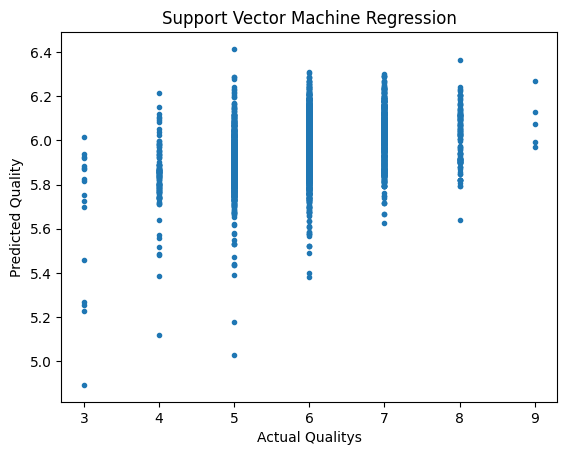

In [30]:
#SOURCES:
#https://www.tutorialspoint.com/how-to-implement-linear-classification-with-python-scikit-learn
#https://github.com/COSC5557/warmup-Sanjeeb-PL/blob/main/warmup.ipynb
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
#https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py
#https://scikit-learn.org/stable/modules/tree.html
#https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles
#https://scikit-learn.org/stable/modules/svm.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RidgeClassifier
import seaborn as sb
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
#Put the white wine dataset into a dataframe
path = 'H:\ML\Warmup\MLAlgorithmSelection\winequality-white.csv'
wine = pd.read_csv(path, sep=';', header = 'infer')
#Get some info on the wine dataframe
wine.info()
wine.describe().T
qualityCol = wine.pop("quality")
x_train, x_test, y_train, y_test = train_test_split(wine, qualityCol, train_size=.2)

#create linear regression object
regModel = linear_model.LinearRegression()
#train the model
regModel.fit(x_train, y_train)
#make predictions
y_predLR = regModel.predict(x_test)

#create a DecisionTree
decTModel = tree.DecisionTreeRegressor()
decTModel = decTModel.fit(x_train, y_train)
y_predDT = decTModel.predict(x_test)

#Create a Random Forest
rfModel = RandomForestRegressor(n_estimators=10)
rfModel = rfModel.fit(x_train, y_train)
y_predRF = rfModel.predict(x_test)

#Create a Gradient Boosting Regression
gbrModel = GradientBoostingRegressor()
gbrModel = gbrModel.fit(x_train, y_train)
y_predGBR = gbrModel.predict(x_test)

#Create a Support Vector Machine
svmModel = svm.SVR()
svmModel = svmModel.fit(x_train, y_train)
y_predSVM = svmModel.predict(x_test)


#LR
# The mean squared error
print("Mean squared error of LR: %.2f" % mean_squared_error(y_test, y_predLR))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination of LR: %.2f" % r2_score(y_test, y_predLR))
#DT
# The mean squared error
print("Mean squared error of DT: %.2f" % mean_squared_error(y_test, y_predDT))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination of DT: %.2f" % r2_score(y_test, y_predDT))
#RF
# The mean squared error
print("Mean squared error of RF: %.2f" % mean_squared_error(y_test, y_predRF))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination of RF: %.2f" % r2_score(y_test, y_predRF))
#GB
# The mean squared error
print("Mean squared error of GB: %.2f" % mean_squared_error(y_test, y_predGBR))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination of GB: %.2f" % r2_score(y_test, y_predGBR))
#SVM
# The mean squared error
print("Mean squared error of SVM: %.2f" % mean_squared_error(y_test, y_predSVM))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination of SVM: %.2f" % r2_score(y_test, y_predSVM))

#Plots
#LR
plt.plot(y_test,y_predLR, '.')
plt.title('Linear Regression')
plt.xlabel('Actual Qualit')
plt.ylabel('Predicted Quality')
plt.show()

#DT
plt.plot(y_test,y_predDT, '.')
plt.title('Decision Tree Regression')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()

#RF
plt.plot(y_test,y_predRF, '.')
plt.title('Random Forest Regression')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()

#GB
plt.plot(y_test,y_predGBR, '.')
plt.title('Gradient Boosting Regression')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()

#SVM
plt.plot(y_test,y_predSVM, '.')
plt.title('Support Vector Machine Regression')
plt.xlabel('Actual Qualitys')
plt.ylabel('Predicted Quality')
plt.show()
